# Theoretical Questions

### Q1: 
What could be some issues if the distribution of the test data is significantly different than the distribution of the training data?

In [1]:
# ---- Your Answer ---- #
# This is a problem of dataset shift, which could lead to inaccuracy of 
# the model. Reasons can range from the irreproducible nature of testing
# conditions given a training time, to the bias of sample selection such 
# as non-uniform selection.

### Q2:

What are some differences you would expect in a model that minimizes squared error, versus a model that minimizes absolute error? 

In which case would each error metric be appropriate?

In [2]:
# ---- Your Answer ---- #
# Minimizing the squared results in finding the mean, whereas minimizing
# the absolute error results in the median. The squared error is easier
# to solve for, the absolute error is more robust to outliers.

# If the delta between the actual and predicted value is large, the 
# squared delta will be larger than the absolute error. You'd want to use
# squared error to limit large errors. If there are more outliers or noise
# in target value, minimizing absolute error would be better.

### Q3:

What error metric would you use to evaluate how good a binary classifier is?

What if the classes are imbalanced?

What if there are more than 2 groups?

In [3]:
# ---- Your Answer ---- #
# When analyzing binary classification, the F1 score measures test accuracy
# by considering both precision and recall and uses a system of weightings.
# If the classes are imbalanced, you'd just change the weightings in the F1
# score.
# For more than 2 groups, you can use an error matrix or confusion matrix
# to visualize the performance. 

### Q4: 

Why might it be preferable to include fewer predictors over many?


In [4]:
# ---- Your Answer ---- #
# To reduce your risk of overfitting. 

# Programming Homework

### Question: Forest Cover Type Prediction

###### Focus: Multi-Class Classification

In the second part of this week's programming homework, you are tasked to develop a classification system to classify forest categories.

The interesting part of the dataset is that the predictors are all cartographic rather than remotely sensed data. 

Data is available at:  https://www.kaggle.com/c/forest-cover-type-prediction

* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data collected by the US Forest Service
* Build a classifier which can accurately classify the forest cover

Hints:
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively





In [14]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

%matplotlib inline

dftrain = pd.read_csv('train.csv', index_col = 'Id')
dftest = pd.read_csv('test.csv', index_col = 'Id')

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


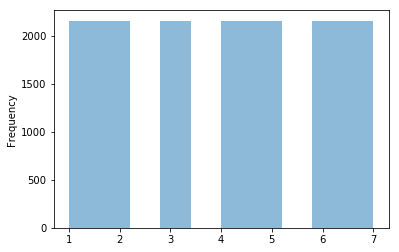

In [90]:
dftrain['Cover_Type'].plot.hist(alpha = 0.5)
dftrain.describe()

In [15]:
trainY = dftrain.Cover_Type
trainX = dftrain.copy()
del trainX['Cover_Type']

In [99]:
dtree = DecisionTreeClassifier()
dtree.fit(trainX, trainY)
pred = dtree.predict(dftest)

In [98]:
rforest = RandomForestClassifier()
rforest.fit(trainX, trainY)
predict = rforest.predict(dftest)

In [95]:
TreeSubmit = dftest.copy()
TreeSubmit['Id'] = TreeSubmit.index
TreeSubmit['Cover_Type'] = pred
Final_dtree = TreeSubmit.iloc[:, 55:56]

In [97]:
ForestSubmit = dftest.copy()
ForestSubmit['Id'] = ForestSubmit.index
ForestSubmit['Cover_Type'] = predict
Final_dforest = ForestSubmit.iloc[:, 55:56]

In [91]:
Final_dtree.to_csv('Decision_Tree.csv')
Final_dforest.to_csv('Random_Forest.csv')

## Prioject Homework

0. Create and turn in a "Product Requirement Document" that has these items in it.

1. Include 2 prioritized lists of requirements:

    * user requirements, mark items where you have low confidence
    * technical requirements, mark items where you have low confidence

2. Decide how you will validate user requirements which you are not sure about?

3. Decide how you will learn and test techcical challenges that you are not sure thatyou can achieve at this time.

4. Whiteboard or draw an architecture and/or data model based on what you know.  Take a picture of it and include it in the document

5. Make your list of what should be done in the next week, assign names to each item.

6. Insert your low tech demo picture (possibly modified) into this document

Turn in this document and also start a folder for your project and save it for your own review later.




## Extra Credit: Forecasting Bike Sharing Demand 

###### Focus: Regression and Feature Engineering

In this week's programming homework, you are tasked to develop a forecasting system for the use of a city bikeshare system. 

The question is based on a for-knowledge competition hosted on Kaggle: 
Reference: Fanaee-T, Hadi, and Gamo, Joao, Event labeling combining detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

Data is available at: https://www.kaggle.com/c/bike-sharing-demand

3 files are provided:
* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data generated by bike sharing systems
* Predict the number of total rentals in each time period during the test phase

Hints: 
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively


